# Adult Dataset

In [8]:
#importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn

#Importing Adult training Dataset
dataset_train = pd.read_csv('C:/Users/Manan/Desktop/Fall 2019/Machine Learning COMP6321/Project/Machine-Learning-Project/classification-models/Adult/data/adult.data',header=None)
data_train = pd.DataFrame(dataset_train)
X = data_train.iloc[:, 1:14].values
Y = data_train.iloc[:, 14].values

#Importing Adult test Dataset
dataset_test = pd.read_csv('C:/Users/Manan/Desktop/Fall 2019/Machine Learning COMP6321/Project/Machine-Learning-Project/classification-models/Adult/data/adult.test',skiprows=1)
data_test = pd.DataFrame(dataset_test)
print(data_test)
X_test = data_test.iloc[:, 1:14].values
Y_test = data_test.iloc[:, 14].values

X_train = X
Y_train = Y

print(dataset_train)
print(dataset_test)
print(X.shape)
print(Y.shape)

#Setting up an array describing if a feature's data is discrete(D) or continuous(C)
datatype = np.array(['D','C','D','C','D','D','D','D','D','C','C','C','D'])

       25        Private   226802           11th   7        Never-married  \
0      38        Private    89814        HS-grad   9   Married-civ-spouse   
1      28      Local-gov   336951     Assoc-acdm  12   Married-civ-spouse   
2      44        Private   160323   Some-college  10   Married-civ-spouse   
3      18              ?   103497   Some-college  10        Never-married   
4      34        Private   198693           10th   6        Never-married   
...    ..            ...      ...            ...  ..                  ...   
16275  39        Private   215419      Bachelors  13             Divorced   
16276  64              ?   321403        HS-grad   9              Widowed   
16277  38        Private   374983      Bachelors  13   Married-civ-spouse   
16278  44        Private    83891      Bachelors  13             Divorced   
16279  35   Self-emp-inc   182148      Bachelors  13   Married-civ-spouse   

        Machine-op-inspct        Own-child                Black     Male  \

In [9]:
dataset_train.info()
dataset_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
0     32561 non-null int64
1     32561 non-null object
2     32561 non-null int64
3     32561 non-null object
4     32561 non-null int64
5     32561 non-null object
6     32561 non-null object
7     32561 non-null object
8     32561 non-null object
9     32561 non-null object
10    32561 non-null int64
11    32561 non-null int64
12    32561 non-null int64
13    32561 non-null object
14    32561 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16280 entries, 0 to 16279
Data columns (total 15 columns):
25                    16280 non-null int64
 Private              16280 non-null object
 226802               16280 non-null int64
 11th                 16280 non-null object
 7                    16280 non-null int64
 Never-married        16280 non-null object
 Machine-op-inspct    16280 non-null object
 Own-child   

In [10]:
# Preprocessing the discrete data
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
for i in range(0,13):
    if datatype[i]=='D':
        X_train[:,i]  = labelencoder.fit_transform(X_train[:,i])
        X_test[:,i]  = labelencoder.fit_transform(X_test[:,i])
Y_train = labelencoder.fit_transform(Y_train)
Y_test = labelencoder.fit_transform(Y_test)

In [11]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [17]:
# Model Accuracy
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier

names = ['KNeighborsClassifier', 'SVC', 'DecisionTreeClassifier', 'RandomForestClassifier','AdaBoostClassifier','LogisticRegression','GaussianNB','MLPClassifier']
models = [KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2),
          SVC(kernel = 'linear', random_state = 0),
          DecisionTreeClassifier(criterion = 'entropy', random_state = 0),
          RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0),
          AdaBoostClassifier(n_estimators=10,learning_rate=1),
          LogisticRegression(random_state = 0,solver='lbfgs',multi_class='ovr'),
          GaussianNB(),
          MLPClassifier(hidden_layer_sizes=(5,),activation='relu',max_iter=100)]

accuracy= np.zeros(8)

for counter, model in enumerate(models):
    model.fit(X_train, Y_train)
    Y_pred=model.predict(X_test)
    accuracy[counter] = sklearn.metrics.accuracy_score(Y_test, Y_pred)*100
    print("Accuracy for " + names[counter] + ":",accuracy[counter])

Accuracy for KNeighborsClassifier: 82.73955773955774
Accuracy for SVC: 81.04422604422604
Accuracy for DecisionTreeClassifier: 80.55896805896806
Accuracy for RandomForestClassifier: 83.42751842751844
Accuracy for AdaBoostClassifier: 84.76044226044226
Accuracy for LogisticRegression: 82.45085995085995
Accuracy for GaussianNB: 80.03685503685503
Accuracy for MLPClassifier: 84.55159705159704


C:\Users\Manan\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Text(0.5, 1.0, 'Adult dataset models accuracy')

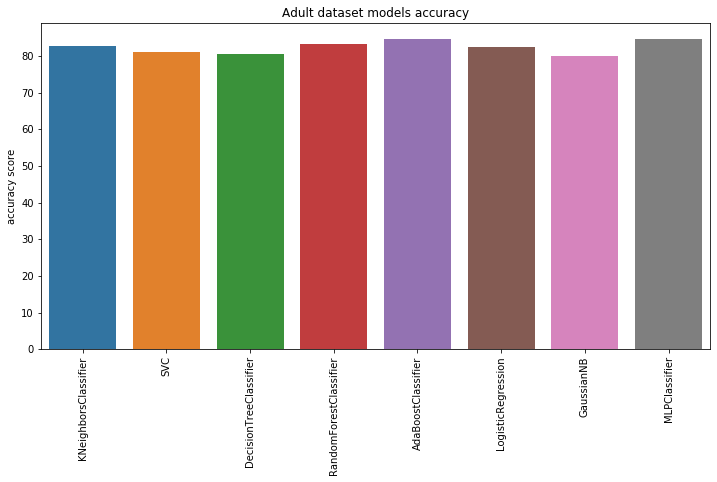

In [18]:
#Comparision graph between all models
import seaborn as sns
y_pos = np.arange(len(names))
heights = [accuracy[0],accuracy[1],accuracy[2],accuracy[3],accuracy[4],accuracy[5],accuracy[6], accuracy[7]]

fig, ax=plt.subplots(1,1,figsize=(12,6))

plt.xticks(rotation='90')
sns.barplot(x=names, y=heights)
plt.ylabel('accuracy score')
plt.title('Adult dataset models accuracy')